<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/pytorch-tutorials/pytorch_Dataset_Dataloader_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Reference : https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = '/content',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = '/content',
    train = False,
    download = True,
    transform = ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



## ToTensor()
PIL Image나 Numpy array를 FloatTensor로 변환하고 이미지의 intensity값을 [0. , 1.]범위로 비레하여 조정(scale)한다.

##Lamda Transform
사용자 정의 람다(lamda)함수 적용. 기존 정수형 label을 원핫으로 부호화된 텐서로 바꾸는 함수를 정의. 먼저 데이터셋 정답의 개수만큼 10개의 zero tensor를 만들고 scatter_ 를 호출하여 주어진 정답 y에 해당하는 인덱스에 value = 1을 할당한다.

In [ ]:
from torchvision.transforms import ToTensor, Lambda

# ToTensor와 lambda Transform 사용한 데이터셋
ds = datasets.FashionMNIST(
    root = "/content",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y : torch.zeros(10, dtype = torch.float).scatter_(0, torch.tensor(y), value = 1))
)

In [ ]:
ds[0][1]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
training_data[0][0].squeeze()

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

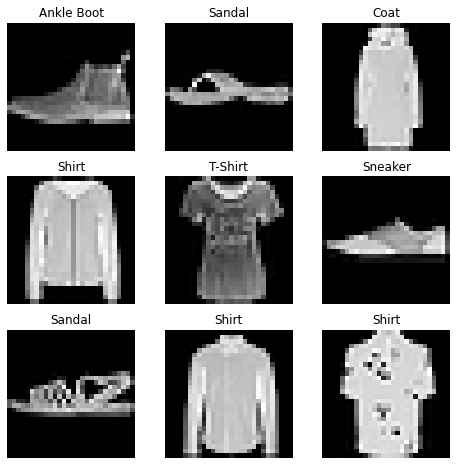

In [ ]:
# 데이터셋을 순회하고 시각화하기
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",    
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size = (1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = 'gray')

plt.show()

In [ ]:
#DataLoader로 학습용 데이터 준비하기

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Features batch shape : torch.Size([64, 1, 28, 28])
labels batch shape : torch.Size([64])


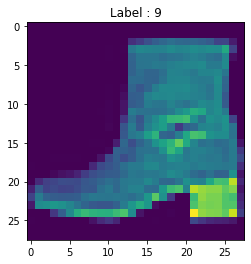

In [ ]:
# DataLoader를 통해 순회하기(iterate)
train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch shape : {train_features.size()}")
print(f"labels batch shape : {train_labels.size()}")
#첫번째 이미지
img = train_features[0].squeeze()
label = train_labels[0]
plt.title(f"Label : {label}")
plt.imshow(img)
plt.show()